In [1]:
#import the basic required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
health_data= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#view the first few rows
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
health_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
#shape
health_data.shape

(5110, 12)

In [6]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Validation

In [7]:
#remove trailing and leading spaces if any
health_data=health_data.applymap(lambda x:x.strip() if isinstance(x,str) else x)

In [8]:
#check for duplicates
duplicates=health_data.duplicated(subset=list(health_data.columns))
health_data[duplicates]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


There are no duplicates in the dataset

In [9]:
#check for missingg values
health_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

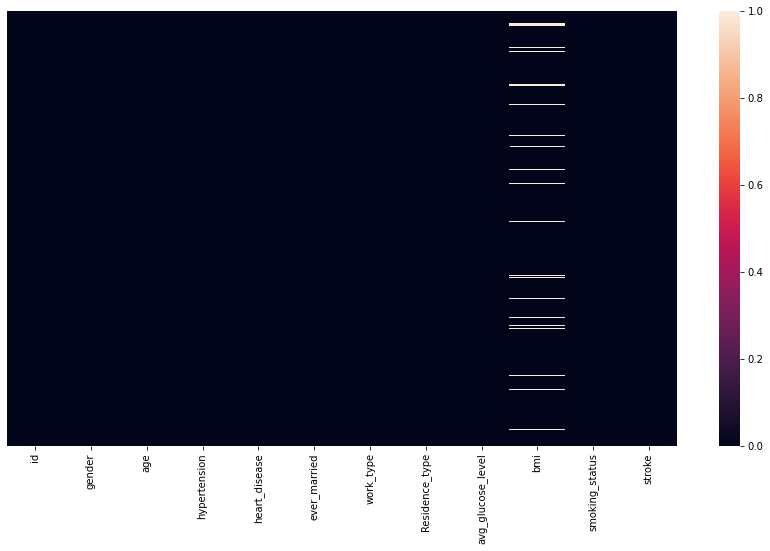

In [10]:
#we can also visualize the missing values
plt.figure(figsize=(15,8))
sns.heatmap(health_data.isna(),yticklabels=False)

From above we can see that we have missing values in bmi

There are different methods to impute the missing values like mean/median/mode imputation, random imputation, frequent category imputaion and so on.
Before selecting the method of imputation, visualize the bmi column.


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

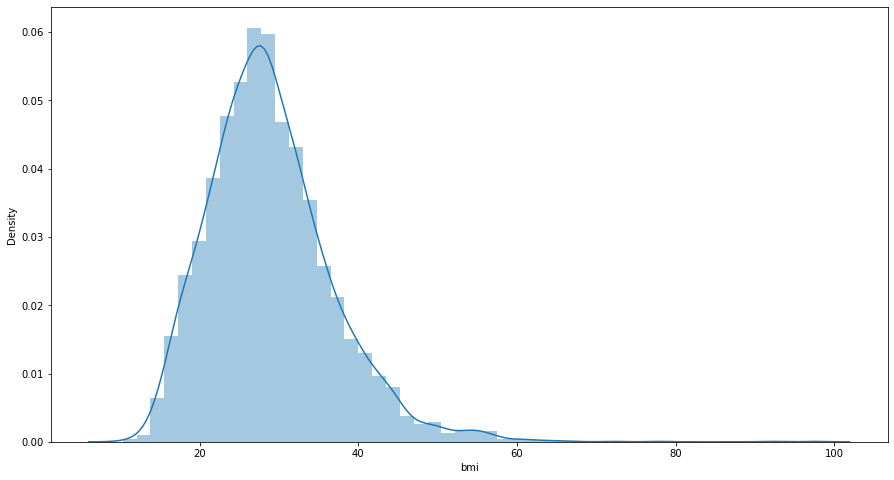

In [11]:
plt.figure(figsize=(15,8))
sns.distplot(health_data['bmi'])

The data is approximately normal distributed, so we can use median imputation


In [12]:
bmi_median= np.median(health_data['bmi'].dropna())
bmi_median

28.1

In [13]:
#create a new variable just to observe how it actually working
health_data['bmi_median']=health_data['bmi'].fillna(bmi_median)

In [14]:
health_data['bmi_median'].isna().sum()

0

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi_median', ylabel='Density'>

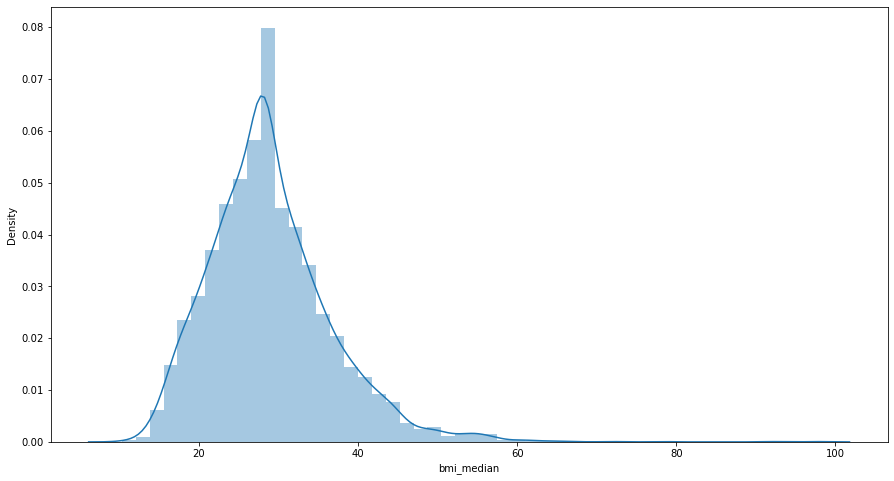

In [15]:
plt.figure(figsize=(15,8))
sns.distplot(health_data['bmi_median'])

There is a slight change in the distribution, let us try with random imputation

In [16]:
#We can also use random imputation by using the function below
def random_imputation(dataset,column):
    df=dataset
    x=column
    #generate a sample that is equal to missing values 
    sample= df[x].dropna().sample(df[x].isna().sum())
    print(sample.shape)
    #missing values
    missing_values= df[df[x].isna()]
    sample.index=missing_values.index
    df.loc[df[x].isna(),x]=sample

    

In [17]:
#Before passing the original make a duplicate
health_data['bmi_ran_imputed']=health_data['bmi']
#pass the function by using the below
random_imputation(health_data,'bmi_ran_imputed')
#check for the missing values
health_data['bmi_ran_imputed'].isna().sum()

(201,)


0

In [18]:
health_data['bmi_ran_imputed'].isna().sum()

0

In [19]:
health_data['bmi_ran_imputed'].head()

0    36.6
1    50.2
2    32.5
3    34.4
4    24.0
Name: bmi_ran_imputed, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi_ran_imputed', ylabel='Density'>

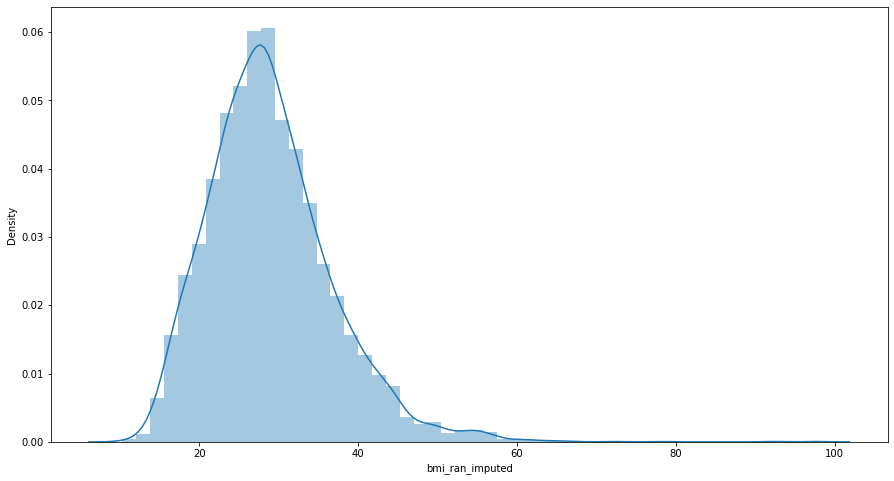

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(health_data['bmi_ran_imputed'])

Random_impuation does not change the imputaion much, so let us stick with random_impuation

In [21]:
health_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_median', 'bmi_ran_imputed'],
      dtype='object')

In [22]:
#let us drop the bmi and bmi_median
health_data.drop(columns=['bmi','bmi_median'],inplace=True)
#rename the imputed column to bmi
health_data.rename(columns={'bmi_ran_imputed':'bmi'},inplace=True)

<AxesSubplot:>

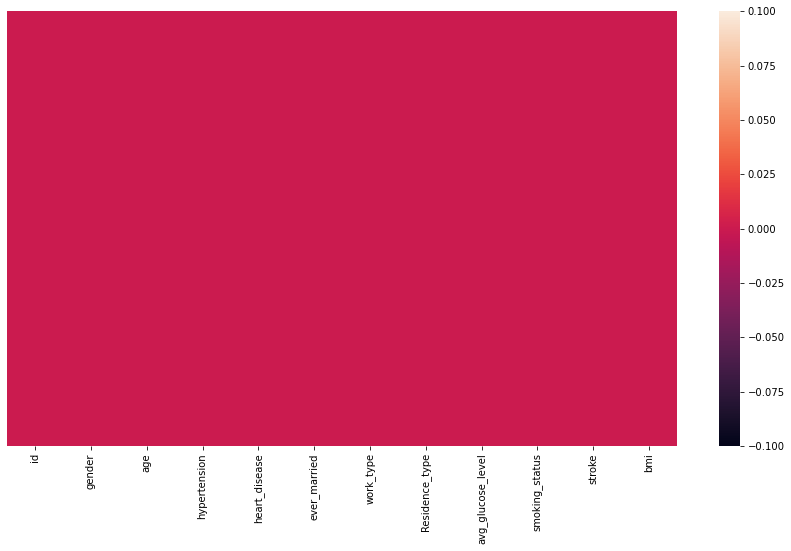

In [23]:
#Let us visualize the missing values again
plt.figure(figsize=(15,8))
sns.heatmap(health_data.isna(),yticklabels=False)

There are no missing values in the dataset now

In [24]:
#let us store the numerical and categorical column names in different lists
numerical_columns= list((health_data.select_dtypes(include=['int64','float64'])).columns)
categorical_columns= list((health_data.select_dtypes(include=['object'])).columns)

In [25]:
numerical_columns

['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'stroke',
 'bmi']

In [26]:
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [27]:
#id doesn't play any role , so we can remove it
numerical_columns.remove('id')

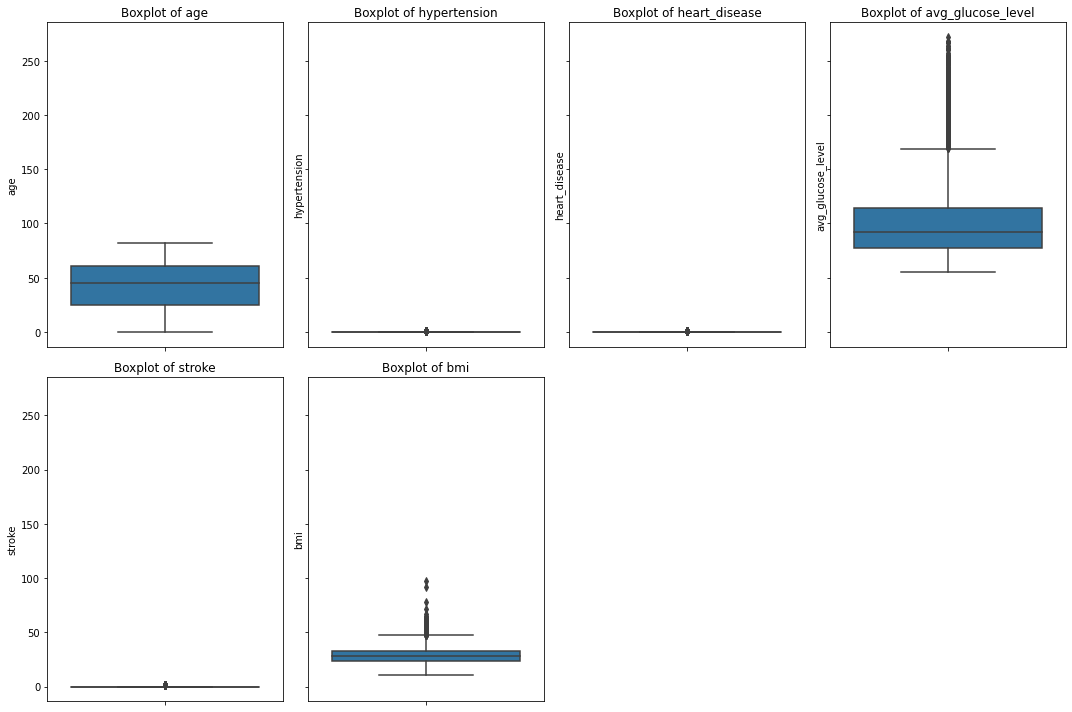

In [28]:
# Create subplots
fig, axes = plt.subplots(2, int(len(numerical_columns)/2)+1, figsize=(15, 5*2), sharey=True)
axes=axes.flatten()
#Finding the outliers
for index,i in enumerate(numerical_columns):
    
    sns.boxplot(y=i,data=health_data,ax=axes[index])
    axes[index].set_title(f'Boxplot of {i}')

#This selects the all the plots after the length, and delaxes remove the empty ones
for ax in axes[len(numerical_columns):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

There are outliers in bmi and avg_glucose_level, but as of now I am not making any attempt to remove them

# DATA VISUALIZATION

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='stroke', ylabel='count'>

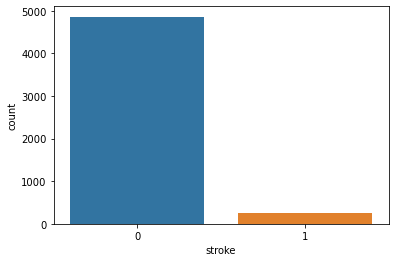

In [29]:
sns.countplot(health_data['stroke'])

Data is completely imbalanced, we should balance it before training a model

<AxesSubplot:xlabel='stroke', ylabel='count'>

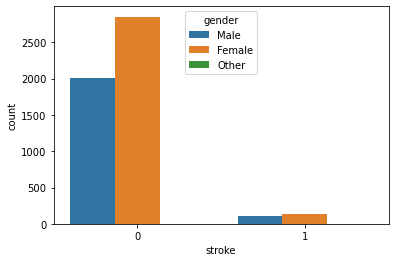

In [30]:
sns.countplot(x='stroke', hue='gender',data=health_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

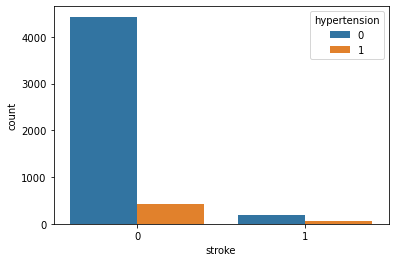

In [99]:
sns.countplot(x='stroke', hue='hypertension',data=health_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

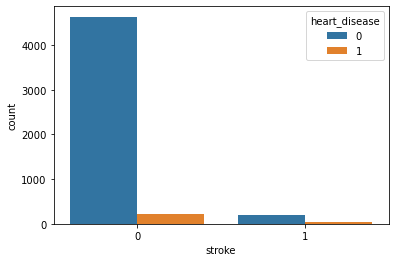

In [100]:
sns.countplot(x='stroke', hue='heart_disease',data=health_data)

<AxesSubplot:xlabel='stroke', ylabel='count'>

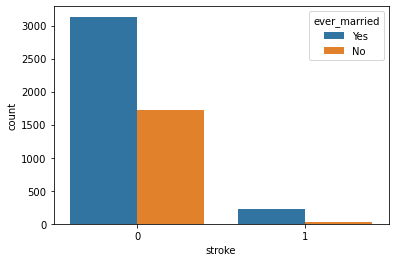

In [31]:
sns.countplot(x='stroke', hue='ever_married',data=health_data)

According to the fig above, we can say that we have data related to female more than a male

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

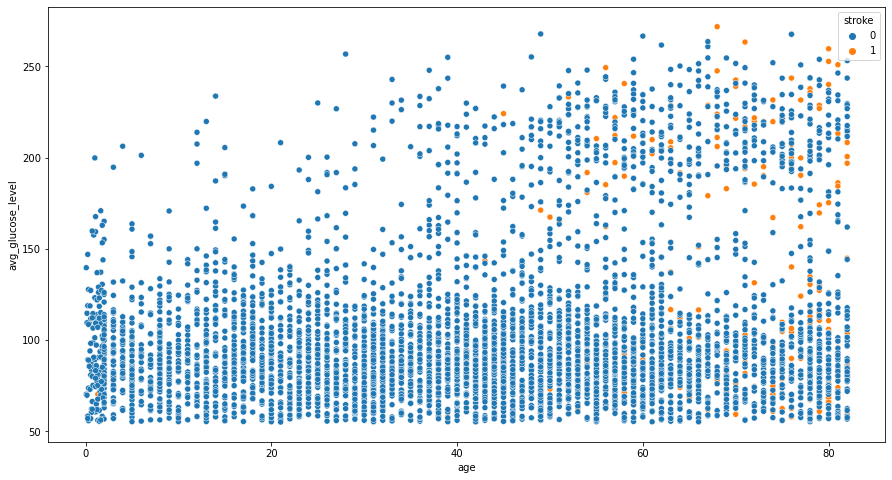

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='age',y='avg_glucose_level',hue='stroke',data=health_data)

Let us encode the data

In [33]:
categorical_columns

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label= LabelEncoder()

In [36]:
health_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [37]:
health_data['gender']=label.fit_transform(health_data['gender'])

In [38]:
health_data['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [39]:
health_data['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [40]:
health_data['ever_married']=label.fit_transform(health_data['ever_married'])

In [41]:
health_data['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [42]:
health_data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [43]:
health_data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [44]:
health_data['Residence_type']=label.fit_transform(health_data['Residence_type'])

In [45]:
health_data['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [46]:
 health_data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

work type and smoking status has more than 3 , so let us employ one hot encoding

In [47]:
health_data_encoded=pd.get_dummies(health_data[['work_type','smoking_status']])

In [48]:
#merge both the datasets and remove the actual ones
health_data=pd.concat([health_data,health_data_encoded],axis=1)
health_data.drop(['work_type','smoking_status'],axis=1,inplace=True)
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,1,36.6,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,1,50.2,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,1,32.5,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,1,34.4,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,1,24.0,0,0,0,1,0,0,0,1,0


Now the data is encoded

In [49]:
#Balance the dataset
from imblearn.over_sampling import SMOTE
X_features=(list(health_data.columns))
X_features.remove('stroke')
X= health_data[X_features]
y= health_data['stroke']

In [50]:
sm=SMOTE()


In [51]:
pip install --upgrade threadpoolctl scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [52]:
X_bal,y_bal= sm.fit_resample(X,y)
#X_bal, y_bal = sm.fit_resample(X,y)

In [53]:
X_bal.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.6,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,0,202.21,50.2,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,0,105.92,32.5,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,1,171.23,34.4,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,0,174.12,24.0,0,0,0,1,0,0,0,1,0


In [54]:
#we dont need id
X_bal.drop(columns=['id'], axis=1, inplace=True)

In [55]:
X_bal.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,50.2,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.5,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.4,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.0,0,0,0,1,0,0,0,1,0


In [57]:
y_bal.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [58]:
y_bal.value_counts()

0    4861
1    4861
Name: stroke, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
train_X, test_X, train_Y, test_Y= train_test_split(X_bal,y_bal,train_size=0.8,random_state=3008)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# DECISION TREE

In [65]:
dec_clf= DecisionTreeClassifier(criterion='gini',min_samples_split=5,max_depth=3)
dec_clf.fit(train_X,train_Y)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [67]:
#predictions,accuracy on train data
accuracy_score(train_Y,dec_clf.predict(train_X))

0.8039089623248039

In [69]:
dec_preds=dec_clf.predict(test_X)

In [70]:
#predictions,accuracy on test data
accuracy_score(test_Y,dec_preds)

0.7912596401028278

In [75]:
#confusion_matrix
print(confusion_matrix(test_Y,dec_preds))

[[723 231]
 [175 816]]


In [76]:
roc_auc_score(test_Y,dec_preds)

0.7906361657432617

In [83]:
print(classification_report(test_Y,dec_preds))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       954
           1       0.78      0.82      0.80       991

    accuracy                           0.79      1945
   macro avg       0.79      0.79      0.79      1945
weighted avg       0.79      0.79      0.79      1945



# Logistic Regression

In [78]:
logistic=LogisticRegression(max_iter=1000000)
logistic.fit(train_X,train_Y)

LogisticRegression(max_iter=1000000)

In [79]:
#predictions,accuracy on train data
accuracy_score(train_Y,logistic.predict(train_X))

0.9237495178089238

In [80]:
log_preds=logistic.predict(test_X)

In [81]:
#predictions,accuracy on test data
accuracy_score(test_Y,log_preds)

0.9280205655526992

In [82]:
roc_auc_score(test_Y,log_preds)

0.9287380978068868

In [91]:
confusion_matrix(test_Y,log_preds)

array([[922,  32],
       [108, 883]], dtype=int64)

In [84]:
print(classification_report(test_Y,log_preds))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       954
           1       0.97      0.89      0.93       991

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945



# RANDOM FOREST 

In [85]:
random_clf=RandomForestClassifier(criterion='gini',min_samples_split=5, max_depth=3)
random_clf.fit(train_X,train_Y)

RandomForestClassifier(max_depth=3, min_samples_split=5)

In [86]:
rf_preds=random_clf.predict(test_X)

In [87]:
#accuracy score on train data
accuracy_score(train_Y, random_clf.predict(train_X))

0.8271827182718272

In [88]:
#accuracy score on test data
accuracy_score(test_Y, rf_preds)

0.8097686375321337

In [89]:
print(classification_report(test_Y, rf_preds))

              precision    recall  f1-score   support

           0       0.87      0.72      0.79       954
           1       0.77      0.89      0.83       991

    accuracy                           0.81      1945
   macro avg       0.82      0.81      0.81      1945
weighted avg       0.82      0.81      0.81      1945



In [90]:
#confusion matrix
confusion_matrix(test_Y, rf_preds)

array([[691, 263],
       [107, 884]], dtype=int64)

# K nearest neighbors

In [92]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(train_X,train_Y)

KNeighborsClassifier()

In [93]:
knn_preds=knn.predict(test_X)

In [95]:
#accuracy score on train data
accuracy_score(train_Y, knn.predict(train_X))

0.8698727015558698

In [94]:
#accuracy score on test data
accuracy_score(test_Y, knn_preds)

0.8195372750642673

In [96]:
print(classification_report(test_Y, knn_preds))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       954
           1       0.78      0.91      0.84       991

    accuracy                           0.82      1945
   macro avg       0.83      0.82      0.82      1945
weighted avg       0.83      0.82      0.82      1945



In [97]:
roc_auc_score(test_Y, knn_preds)

0.8178184372137498

In [98]:
print(confusion_matrix(test_Y, knn_preds))

[[694 260]
 [ 91 900]]


Based on Accuracy,f1-score and other metrics Logistic Regression is the best model followed by Random Forest, KNN and Decision tree